[ 1.52336381  1.09625665  2.89638932  1.18021306  1.30027655  1.14594931
  1.23668293  4.85439606  1.00956648  1.88589941  1.28748389  1.00555143
  1.9151178   1.62640663  1.45035269  2.41261956  1.09861655  2.39196661
  1.24810709  1.02176534  2.39116947  1.08872764  1.14300356  1.43306799
  1.39011131  3.03731649  1.14119647  1.16085097  1.6426355   1.32519598
  1.56178237  1.44612051  1.27936542  1.03025578  2.44564992  1.27920669
  1.26602639  1.00678113  1.07495963  1.11769661  1.8209496   1.09279197
  1.38101123  1.63630108  1.11809874  1.02565927  1.9234291   1.58295314
  1.9944705   1.27721099  1.33064595  2.79278453  9.28284522  4.16943027
  1.13044563  1.17696423  1.75612035  2.90382456  2.03736078  1.0223641
  1.28993809  1.36869378  1.25766729  1.45671537  2.07027028 12.85888921
  1.36795016  1.1533492   1.2031062   2.12306912  2.12891851  3.06583964
  3.96660284  1.77887959  1.90090099  1.08843027  1.12110552  3.26903243
  1.48887687  1.10529599  1.09594269  2.32021812  2.

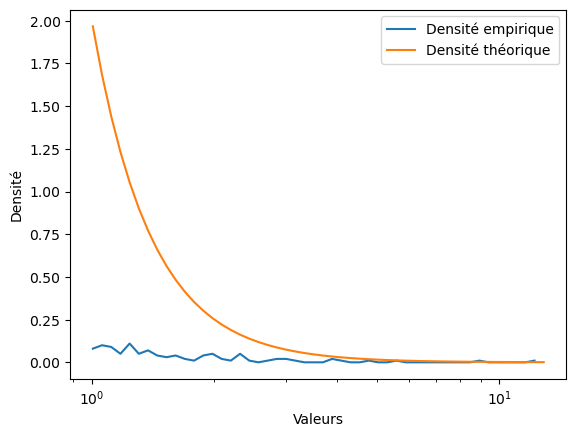

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Paramètres de la loi de Pareto
xm = 1 # Valeur minimale de la distribution
alpha = 2 # Paramètre de forme

# Simulation de la loi de Pareto
n = 100 # Nombre d'échantillons
pareto_samples = pareto.rvs(alpha, size=n, scale=xm)
print(pareto_samples)
# Calcul de la densité empirique
bins = np.logspace(start=np.log10(min(pareto_samples)), stop=np.log10(max(pareto_samples)), num=50)
hist, _ = np.histogram(pareto_samples, bins=bins, density=True)
empirical_density = hist * np.diff(bins)

# Calcul de la densité théorique
theoretical_density = pareto.pdf(bins, alpha, scale=xm)

# Tracé des densités
fig, ax = plt.subplots()
ax.plot(bins[:-1], empirical_density, label='Densité empirique')
ax.plot(bins, theoretical_density, label='Densité théorique')
ax.legend()
ax.set_xscale('log')
ax.set_xlabel('Valeurs')
ax.set_ylabel('Densité')
plt.show()


In [3]:
# Estimation des quantiles extrêmes
# Niveau de quantile
q1 = 0.01
q2 = 0.99 
pareto_quantile1 = pareto.ppf(q1, alpha, scale=xm)
mc_quantile1 = np.quantile(pareto_samples, q1)
pareto_quantile2 = pareto.ppf(q2, alpha, scale=xm)
mc_quantile2 = np.quantile(pareto_samples, q2)

print("Quantile estimé par Monte-Carlo a 1%: ", mc_quantile1)
print("Quantile théorique a 1% : ", pareto_quantile1)

print("Quantile estimé par Monte-Carlo a 99%: ", mc_quantile2)
print("Quantile théorique a 99% : ", pareto_quantile2)

Quantile estimé par Monte-Carlo a 1%:  1.0046554067230231
Quantile théorique a 1% :  1.005037815259212
Quantile estimé par Monte-Carlo a 99%:  5.614275986264825
Quantile théorique a 99% :  9.999999999999996
